In [13]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [14]:
train_file = open("train_dataset.pickle","rb")

In [15]:
train_file.seek(0)

0

In [16]:
Train = pickle.load(train_file)

In [17]:
import numpy as np

In [18]:
np.random.shuffle(Train)

In [19]:
Train = np.split(Train, 20)

In [20]:
for i in range(len(Train)):
    Train[i] = np.split(Train[i], 2, axis = 1)

In [21]:
test_file = open("test_dataset.pickle","rb")
Test = pickle.load(test_file)
Test = np.split(Test, 2, axis = 1)

In [22]:
biases = []
variance_degs = []
MSEs = []
degrees = []
for deg in range(1,16):
    values = []
    bias_values = np.zeros(200)
    mse = np.zeros(200)
    poly = PolynomialFeatures(degree=deg)
    for i in range(20):
        model = LinearRegression()
        model.fit(poly.fit_transform(Train[i][0]), Train[i][1])
        pred = model.predict(poly.fit_transform(Test[0]))
        values.append(pred)
        bias_values = np.add(bias_values,pred)
        mse = np.add(np.square(np.subtract(pred,Test[1])),mse)
    avg_bias = np.mean(np.abs(np.subtract(np.divide(bias_values,20),Test[1])))
    values = np.array(values)
#     print(np.var(values, axis = 0 ))
    avg_var = np.mean(np.var(values, axis = 0))
    avg_ie = np.mean(np.subtract(np.divide(mse,20), np.add(np.square(np.abs(np.subtract(np.divide(bias_values,20),Test[1]))), np.var(values, axis = 0))))
    if(deg<=10):
        degrees.append(deg)
    #     print(values)
        biases.append(avg_bias*avg_bias)
        MSEs.append(np.mean(np.divide(mse,20)))
        variance_degs.append(avg_var)    
    print(deg,":")
    print(avg_bias)
    print(avg_var)
    print(avg_ie)

1 :
0.26989619888569366
0.007744736667393074
3.91700560875563e-17
2 :
0.08676442478975882
0.001025630056046548
4.5628648429052455e-18
3 :
0.03347353828582504
0.00037280679016533127
1.2628244804024914e-18
4 :
0.024538836464311837
0.00040873793994757247
-7.082550691761557e-19
5 :
0.024198692825535734
0.000670690995641298
-3.875074089734754e-18
6 :
0.023682640408209926
0.0007787075676527011
1.850733108432756e-18
7 :
0.024594970416211892
0.0012291598062910368
-1.5468854495936935e-18
8 :
0.024927988149918808
0.0019183218264712362
-3.3810844748960454e-18
9 :
0.02629682968084606
0.004457014734405403
2.007264797085351e-18
10 :
0.028596892522212307
0.009943358118258387
4.366353199142248e-18
11 :
0.02919084561625966
0.05520518402898727
5.859028540111666e-18
12 :
0.03519487467236138
0.07652514659659233
-1.4297238523294787e-17
13 :
0.06946266824917025
1.8345763253236311
6.240288234066194e-17
14 :
0.07477526276621624
1.0992938724231682
6.747044329485918e-17
15 :
0.24348675574937734
11.2567547252081

In [23]:
import matplotlib.pyplot as plt

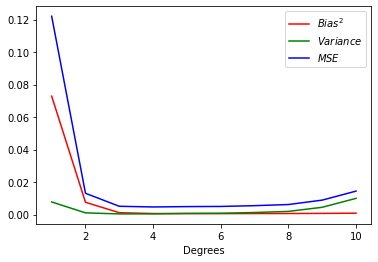

In [24]:
fig, ax = plt.subplots()
ax.plot(degrees, biases, color = 'red', label = '$Bias^2$')
ax.plot(degrees, variance_degs, color = 'green', label = '$Variance$')
ax.plot(degrees, MSEs, color = 'blue', label = '$MSE$')

ax.set_xlabel('Degrees')
ax.legend()

plt.show()